# Preprocesamiento de textos

Este JNB contiene algunas de las funciones de preprocesamiento de textos más usadas en NLP. Vamos a ver cómo utilizarlas para preprocesar tanto cadenas sencillas como datasets completos con miles de textos.

No siempre es necesario usar todas estas técnicas a la hora de preparar los textos, el usar unas u otras, e incluso el orden en el que hemos de aplicarlas, es algo que dependerá mucho del problema al que nos enfrentemos.

Para ello vamos a usar el dataset que se puede descargar de la competición de Kaggle [Spanish Arilines Tweets Sentiment Analysis](https://www.kaggle.com/c/spanish-arilines-tweets-sentiment-analysis/data).

## Importar el dataset

In [1]:
import pandas as pd

In [2]:
# Importamos el dataset con el que vamos a trabajar
df_t = pd.read_csv('data/tweets_public.csv')
df_t.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,neutral,False,0,0,Trabajar en #Ryanair como #TMA: https://t.co/...,NaN,Fri Nov 03 12:05:12 +0000 2017,926419989107798016,NaN,Madrid
1,neutral,True,0,0,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,NaN,Sun Nov 26 18:40:28 +0000 2017,934854385577943041,NaN,Mexico City
2,negative,False,0,0,Sabiais que @Iberia te trata muy bien en santi...,NaN,Mon Dec 25 15:40:45 +0000 2017,945318406441635840,NaN,Madrid
3,negative,False,0,0,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\r...,NaN,Mon Nov 06 14:18:35 +0000 2017,927540721296568320,NaN,Pacific Time (US & Canada)
4,positive,True,0,0,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...,NaN,Mon Jan 01 23:00:57 +0000 2018,947965901332197376,NaN,Buenos Aires


In [3]:
# Creamos un texto simple de muestra
sample_text = 'Hace muchos años, en un lugar muy lejano, había un Rey al que todos consideraban muy sabio. Gobernaba con gran justicia 9 aldeas. Las 9 eran vecinas y en perfecta armonía todas convivían. El Rey se ocupaba de que todas las aldeas tuvieran agua, comida y una bonita escuela. Las 9 aldeas estaban rodeadas por 9 riachuelos. Y el Rey construyo 9 molinos y 9 puentes para que todos pudieran cruzar de un lado a otro sin correr ningún riesgo.'

In [4]:
sample_text

'Hace muchos años, en un lugar muy lejano, había un Rey al que todos consideraban muy sabio. Gobernaba con gran justicia 9 aldeas. Las 9 eran vecinas y en perfecta armonía todas convivían. El Rey se ocupaba de que todas las aldeas tuvieran agua, comida y una bonita escuela. Las 9 aldeas estaban rodeadas por 9 riachuelos. Y el Rey construyo 9 molinos y 9 puentes para que todos pudieran cruzar de un lado a otro sin correr ningún riesgo.'

## Convertir texto a minúsculas

In [5]:
sample_text_clean = sample_text.lower()
sample_text_clean

'hace muchos años, en un lugar muy lejano, había un rey al que todos consideraban muy sabio. gobernaba con gran justicia 9 aldeas. las 9 eran vecinas y en perfecta armonía todas convivían. el rey se ocupaba de que todas las aldeas tuvieran agua, comida y una bonita escuela. las 9 aldeas estaban rodeadas por 9 riachuelos. y el rey construyo 9 molinos y 9 puentes para que todos pudieran cruzar de un lado a otro sin correr ningún riesgo.'

In [6]:
df_t['text_clean'] = df_t['text'].str.lower()

# Mostramos el antes y el después
print(df_t.loc[0, 'text'])
print()
print(df_t.loc[0, 'text_clean'])

 Trabajar en #Ryanair como #TMA: https://t.co/ruUArBe1tO #empleo

 trabajar en #ryanair como #tma: https://t.co/ruuarbe1to #empleo


## Eliminar números

In [7]:
import re

In [8]:
# Sustituimos los números por un espacio
sample_text_clean = re.sub(r'\d+', ' ', sample_text)
sample_text_clean

'Hace muchos años, en un lugar muy lejano, había un Rey al que todos consideraban muy sabio. Gobernaba con gran justicia   aldeas. Las   eran vecinas y en perfecta armonía todas convivían. El Rey se ocupaba de que todas las aldeas tuvieran agua, comida y una bonita escuela. Las   aldeas estaban rodeadas por   riachuelos. Y el Rey construyo   molinos y   puentes para que todos pudieran cruzar de un lado a otro sin correr ningún riesgo.'

In [9]:
df_t['text_clean'] = df_t['text'].str.replace(r'\d+', ' ', regex=True)

print(df_t.loc[5, 'text'])
print()
print(df_t.loc[5, 'text_clean'])

@mgd_1970 Wow que bonito , yo solo he volado unas 3 o 4 veces en un 747 de @Iberia y siempre fue a tu tierra :)

@mgd_  Wow que bonito , yo solo he volado unas   o   veces en un   de @Iberia y siempre fue a tu tierra :)


## Eliminar acentos

Aquí tenemos varias opciones:
1. La librería `unidecode`
2. La función `translate()`

### Usando `unidecode`

Esta biblioteca contiene una función que toma una cadena, que posiblemente contenga caracteres no ASCII, y devuelve una cadena que se puede codificar de forma segura en ASCII.

In [10]:
from unidecode import unidecode

In [11]:
unidecode(sample_text)

'Hace muchos anos, en un lugar muy lejano, habia un Rey al que todos consideraban muy sabio. Gobernaba con gran justicia 9 aldeas. Las 9 eran vecinas y en perfecta armonia todas convivian. El Rey se ocupaba de que todas las aldeas tuvieran agua, comida y una bonita escuela. Las 9 aldeas estaban rodeadas por 9 riachuelos. Y el Rey construyo 9 molinos y 9 puentes para que todos pudieran cruzar de un lado a otro sin correr ningun riesgo.'

**¡Ojo!** Nos ha cambiado `'años'` por `'anos'`. Si estamos trabajando por ejemplo con informes médicos esto no es admisible.

In [12]:
df_t['text_clean'] = df_t['text'].apply(unidecode)

print(df_t.loc[3, 'text'])
print()
print(df_t.loc[3, 'text_clean'])

NUNCA NUNCA NUNCA pidáis el café de Ryanair.
Bueno, nada que vendan a bordo.

NUNCA NUNCA NUNCA pidais el cafe de Ryanair.
Bueno, nada que vendan a bordo.


### Usando `translate()`

Esta función devuelve una cadena donde una serie de caracteres especificados se reemplazan con el carácter descrito en un diccionario o en una tabla de mapeo. Lo bueno de esta función es que nos permite especificar qué es lo que queremos cambiar y así quedarnos con ciertos símbolos que nos interesen. Si trabajamos con textos en castellano esto nos permite conservar las eñes (`ñ`).

In [13]:
# Creamos la tabla de mapeo
trans_dict = {"á": "a", "é": "e", "í": "i", "ó": "o", "ú": "u", "ü": "u"}
trans_table = "áéíóúñöü".maketrans(trans_dict)

# Hacemos los reemplazos
sample_text_clean = sample_text.translate(trans_table)
sample_text_clean

'Hace muchos años, en un lugar muy lejano, habia un Rey al que todos consideraban muy sabio. Gobernaba con gran justicia 9 aldeas. Las 9 eran vecinas y en perfecta armonia todas convivian. El Rey se ocupaba de que todas las aldeas tuvieran agua, comida y una bonita escuela. Las 9 aldeas estaban rodeadas por 9 riachuelos. Y el Rey construyo 9 molinos y 9 puentes para que todos pudieran cruzar de un lado a otro sin correr ningun riesgo.'

In [14]:
df_t['text_clean'] = df_t['text'].str.translate(trans_table)

print(df_t.loc[1, 'text'])
print()
print(df_t.loc[1, 'text_clean'])

@Iberia @FIONAFERRER Cuando gusten en Cancún se viaja y disfruta de manera sin igual

@Iberia @FIONAFERRER Cuando gusten en Cancun se viaja y disfruta de manera sin igual


## Eliminar signos de puntuación

En general, debe hacerse después de la tokenización ya que si no esta puede verse afectada, aunque dependerá del tipo de tokenizador que usemos.

Debemos tener cuidado cuando eliminamos ciertos signos, como por ejemplo los de interrogación, ya que pueden ser importantes dependiendo del objetivo de nuestra aplicación.

Podemos obtener una lista con los signos de puntuación más comunes usando la librería `string`.

In [15]:
import string

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Si estamos trabajando con textos en español seguramente querremos añadir otros signos de puntuación. Un listado más completo es el que se especifica a continuación.

In [17]:
punct_es = r'.,;:"#$%&\'()*+-/<=>@[\\]^_`{|}~¿?¡!ºª'

Primero creamos la tabla de traducción que elimina los signos de puntuación de los textos.

In [18]:
# Creamos la tabla de mapeo
# Opción 1. Elimina los signos de puntuación
traslator = str.maketrans('', '', punct_es)
# Opción 2. Los sustituye por un espacio
# traslator = str.maketrans(punct_es, ' '*len(punct_es))

# Hacemos los reemplazos
sample_text_clean = sample_text.translate(traslator)
sample_text_clean

'Hace muchos años en un lugar muy lejano había un Rey al que todos consideraban muy sabio Gobernaba con gran justicia 9 aldeas Las 9 eran vecinas y en perfecta armonía todas convivían El Rey se ocupaba de que todas las aldeas tuvieran agua comida y una bonita escuela Las 9 aldeas estaban rodeadas por 9 riachuelos Y el Rey construyo 9 molinos y 9 puentes para que todos pudieran cruzar de un lado a otro sin correr ningún riesgo'

Como ves, puedes tanto eliminar simplemente los signos de puntuación como sustituirlos por un espacio, como siempre, esto dependerá de tu aplicación.

Con la segunda opción, la que los sustituye por un espacio, evitamos por ejemplo que en las situaciones en las que hay errores del tipo `'...casa.Mañana...'` nos encontremos con cosas como `'casaMañana'` en lugar de dos tokens diferentes como serían `'casa'` y `'Mañana'`, aunque si hemos tokenizado antes en principio tampoco sería un problema dependiendo del tokenizador que usemos.

In [19]:
df_t['text_clean'] = df_t['text'].str.translate(traslator)

print(df_t.loc[2, 'text'])
print()
print(df_t.loc[2, 'text_clean'])

Sabiais que @Iberia te trata muy bien en santiago de chile?Te cambia el asiento,te manda a volar en el wc trasero,e… https://t.co/uansbOnn69

Sabiais que Iberia te trata muy bien en santiago de chileTe cambia el asientote manda a volar en el wc traseroe… httpstcouansbOnn69


También podemos usar la función `replace()` junto con expresiones regulares, lo que es muy útil ya que permite personalizar el tipo de reemplazo que queremos hacer. Por ejemplo, podemos usar la expresión regular `[^\w\s]` para seleccionar todos aquellos caracteres ASCII que no son `[A-Za-z0-9_]` (`\w`) o `[ \t\r\n\f]` (`\s`) y eliminarlos.

In [20]:
sample_text_clean = re.sub(r'[^\w\s]', '', sample_text)
sample_text_clean

'Hace muchos años en un lugar muy lejano había un Rey al que todos consideraban muy sabio Gobernaba con gran justicia 9 aldeas Las 9 eran vecinas y en perfecta armonía todas convivían El Rey se ocupaba de que todas las aldeas tuvieran agua comida y una bonita escuela Las 9 aldeas estaban rodeadas por 9 riachuelos Y el Rey construyo 9 molinos y 9 puentes para que todos pudieran cruzar de un lado a otro sin correr ningún riesgo'

**¡Ojo!** Vemos que esto NO ha quitado los acentos ni la `'ñ'`.

## Eliminar espacios innecesarios

Muchas veces hay espacios en el texto que no aportan información y conviene limpiarlos. Estos pueden estar tanto al inicio y final del texto como entremedias.

Lo primero que vamos a hacer es generar esos espacios en nuestro texto de ejemplo sustituyendo los signos de puntuación por espacios para ver luego cómo eliminarlos.

In [21]:
# Sustituimos los signos de puntuación
punct_es = r'.,;:"#$%&\'()*+-/<=>@[\\]^_`{|}~¿?¡!ºª'
traslator = str.maketrans(punct_es, ' '*len(punct_es))

sample_text_clean = sample_text.translate(traslator)
sample_text_clean

'Hace muchos años  en un lugar muy lejano  había un Rey al que todos consideraban muy sabio  Gobernaba con gran justicia 9 aldeas  Las 9 eran vecinas y en perfecta armonía todas convivían  El Rey se ocupaba de que todas las aldeas tuvieran agua  comida y una bonita escuela  Las 9 aldeas estaban rodeadas por 9 riachuelos  Y el Rey construyo 9 molinos y 9 puentes para que todos pudieran cruzar de un lado a otro sin correr ningún riesgo '

### En los extremos

In [22]:
sample_text_clean = sample_text_clean.strip()
sample_text_clean

'Hace muchos años  en un lugar muy lejano  había un Rey al que todos consideraban muy sabio  Gobernaba con gran justicia 9 aldeas  Las 9 eran vecinas y en perfecta armonía todas convivían  El Rey se ocupaba de que todas las aldeas tuvieran agua  comida y una bonita escuela  Las 9 aldeas estaban rodeadas por 9 riachuelos  Y el Rey construyo 9 molinos y 9 puentes para que todos pudieran cruzar de un lado a otro sin correr ningún riesgo'

In [23]:
df_t['text_clean'] = df_t['text'].str.strip()

print(df_t.loc[0, 'text'])
print()
print(df_t.loc[0, 'text_clean'])

 Trabajar en #Ryanair como #TMA: https://t.co/ruUArBe1tO #empleo

Trabajar en #Ryanair como #TMA: https://t.co/ruUArBe1tO #empleo


### Dentro del texto

In [24]:
# Si solo queremos eliminar los espacios duplicados
sample_text_clean = re.sub(r' {2,}', ' ', sample_text_clean)
sample_text_clean

'Hace muchos años en un lugar muy lejano había un Rey al que todos consideraban muy sabio Gobernaba con gran justicia 9 aldeas Las 9 eran vecinas y en perfecta armonía todas convivían El Rey se ocupaba de que todas las aldeas tuvieran agua comida y una bonita escuela Las 9 aldeas estaban rodeadas por 9 riachuelos Y el Rey construyo 9 molinos y 9 puentes para que todos pudieran cruzar de un lado a otro sin correr ningún riesgo'

Si queremos eliminar todos los _whitespace characters_ o `[ \t\r\n\f]` repetidos usaremos la expresión regular `r'\s{2,}'`.

In [25]:
df_t['text_clean'] = df_t['text'].str.replace(r'\s{2,}', ' ', regex=True)

print(df_t.loc[17, 'text'])
print()
print(df_t.loc[17, 'text_clean'])

@algoqrecordar @Iberia  @viajarlocura @lacosmopolilla   @WanderlustTB @TragaViajes  Una suerte poder volar, pero especialmente aterrizar 👉✌😜

@algoqrecordar @Iberia @viajarlocura @lacosmopolilla @WanderlustTB @TragaViajes Una suerte poder volar, pero especialmente aterrizar 👉✌😜


## Eliminar emojis y emoticonos

Para eliminar emoticonos y emojis existen una serie de librerías que nos van a facilitar mucho el trabajo. En el caso de los emojis podemos usar también expresiones regulares.

### Usando expresiones regulares

Vamos a eliminar los emojis de los textos usando expresiones regulares.

In [26]:
emoji_sample_text = "¡Hasta pronto! 😚"

Lo primero que vamos a hacer es definir una función para eliminar los emojis que podamos reutilizar con cualquier texto. En ella debemos especificar los códigos Unicode de los emojis que queremos eliminar y, a continuación, compilar la expresión regular para crear un patrón que nos va a permitir encontrar los emojis en el texto, para luego eliminarlos o sustituirlos por el carácter que deseemos.

In [27]:
def remove_emojis(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", re.UNICODE)
    return re.sub(emoji_pattern, '', string)

In [28]:
remove_emojis(emoji_sample_text)

'¡Hasta pronto! '

El problema de esta función es que debemos asegurarnos de que contiene el listado completo de códigos, el cual cambia ya que cada cierto tiempo se añaden nuevos emojis al catálogo. También nos da la flexibilidad de poder especificar cuáles queremos eliminar por si solo quisiéramos quitar algunos en concreto.

Podemos consultar las diferentes versiones del listado completo de emojis en [Unicode.org](http://unicode.org/Public/emoji/) y el listado de la última versión en [Full Emoji List, v14.0](http://www.unicode.org/emoji/charts/full-emoji-list.html). 

In [29]:
df_t['text_clean'] = df_t['text'].apply(remove_emojis)

print(df_t.loc[52, 'text'])
print()
print(df_t.loc[52, 'text_clean'])

Hola @Iberia. He hecho check in con la app, después de muchos meses y la experiencia ha sido brutalmente buena. 👌🙂👏🏻

Hola @Iberia. He hecho check in con la app, después de muchos meses y la experiencia ha sido brutalmente buena. 


### Usando la librería `emot`

Esta librería nos permite trabajar tanto con emojis como con emoticonos. Para poder usarla necesitamos instalarla previamente.

Puedes consultar más información sobre esta librería en su repositorio de [GitHub](https://github.com/NeelShah18/emot).

In [30]:
# !pip install emot --upgrade

In [31]:
# Importamos la librería
import emot

In [32]:
# Instanciamos objeto emot
emot_obj = emot.core.emot()

#### Convertir emoticonos a texto

In [33]:
def convert_emoticons_to_text(text):
    emoticons_dict = emot_obj.emoticons(text)

    for i, emoticon in enumerate(emoticons_dict.get('value')):
        text = re.sub(re.escape(emoticon), emoticons_dict['mean'][i], text)

    return text

In [34]:
emoticon_sample_text = "¡Hasta luego! :‑) :-*"

In [35]:
convert_emoticons_to_text(emoticon_sample_text)

'¡Hasta luego! Happy face or smiley Kiss'

#### Eliminar emoticonos del texto

In [36]:
def remove_emoticons_from_text(text):
    emoticons_dict = emot_obj.emoticons(text)

    for i, emoticon in enumerate(emoticons_dict.get('value')):
        text = re.sub(re.escape(emoticon), '', text)

    return text

In [37]:
remove_emoticons_from_text(emoticon_sample_text)

'¡Hasta luego!  '

Si queremos ver el listado de emoticonos disponibles en esta librería podemos hacer lo siguiente:

In [38]:
from emot.emo_unicode import EMOTICONS_EMO

In [39]:
# Descomenta esta línea para ver el listado completo
# EMOTICONS_EMO

#### Convertir emojis a texto

In [40]:
emot_obj = emot.core.emot()


def convert_emojis_to_text(text):
    emojis_dict = emot_obj.emoji(text)

    for i, emoji in enumerate(emojis_dict.get('value')):
        text = re.sub(emoji, emojis_dict['mean'][i].replace(
            '_', ' ').replace(':', ' '), text)

    return text

In [41]:
emojis_sample_text = "¡Hasta luego! 👋😘"

In [42]:
convert_emojis_to_text(emojis_sample_text)

'¡Hasta luego!  waving hand  face blowing a kiss '

#### Eliminar emojis del texto

In [43]:
def remove_emojis_from_text(text):
    emojis_dict = emot_obj.emoji(text)

    for i, emoji in enumerate(emojis_dict.get('value')):
        text = re.sub(emoji, '', text)

    return text

In [44]:
remove_emojis_from_text(emojis_sample_text)

'¡Hasta luego! '

Si queremos ver el listado de emojis disponibles en esta librería podemos hacer lo siguiente:

In [45]:
from emot.emo_unicode import EMOJI_UNICODE

In [46]:
# Descomenta esta línea para ver el listado completo
# EMOJI_UNICODE

Para aplicar cualquiera de las funciones anteriores a nuestro dataset, solo tenemos que hacer lo siguiente:

In [47]:
df_t['text_clean'] = df_t['text'].apply(convert_emoticons_to_text)

print(df_t.loc[385, 'text'])
print()
print(df_t.loc[385, 'text_clean'])

Por allí estaremos la semana que viene! Mucha suerte a todos los participantes :3 https://t.co/1N2BrpQlvj

Por allí estaremos la semana que viene! Mucha suerte a todos los participantes Happy face smiley httpsSkeptical, annoyed, undecided, uneasy or hesitant/t.co/1N2BrpQlvj


In [48]:
df_t['text_clean'] = df_t['text'].apply(convert_emojis_to_text)

print(df_t.loc[52, 'text'])
print()
print(df_t.loc[52, 'text_clean'])

Hola @Iberia. He hecho check in con la app, después de muchos meses y la experiencia ha sido brutalmente buena. 👌🙂👏🏻

Hola @Iberia. He hecho check in con la app, después de muchos meses y la experiencia ha sido brutalmente buena.  OK hand  slightly smiling face  clapping hands light skin tone 


### Usando la librería `emoji`

Como podemos ver, con las funciones anteriores conseguimos hacer las sustituciones correctamente, pero el problema es que la traducción que nos devuelve para emojis y emoticonos está en inglés.

Si necesitamos que esté en castellano podemos usar la librería `emoji`, pero como indica su propio nombre solo funciona con los emojis y no con los emoticonos.

Al igual que en el caso anterior, también tendremos que instalar esta librería antes de poder usarla.

Puedes consultar más información sobre esta librería en su repositorio de [GitHub](https://github.com/carpedm20/emoji/).

In [49]:
# !pip install emoji --upgrade

In [50]:
import emoji

In [51]:
emojis_sample_text = "¡Hasta luego! 👋😘"

In [52]:
emoji.demojize(emojis_sample_text, language='es')

'¡Hasta luego! :mano_saludando::cara_lanzando_un_beso:'

In [53]:
df_t['text_clean'] = df_t['text'].apply(lambda x: emoji.demojize(x, language='es'))

print(df_t.loc[52, 'text'])
print()
print(df_t.loc[52, 'text_clean'])

Hola @Iberia. He hecho check in con la app, después de muchos meses y la experiencia ha sido brutalmente buena. 👌🙂👏🏻

Hola @Iberia. He hecho check in con la app, después de muchos meses y la experiencia ha sido brutalmente buena. :señal_de_aprobación_con_la_mano::cara_sonriendo_ligeramente::manos_aplaudiendo_tono_de_piel_claro:


## Eliminar menciones y hashtags

En ocasiones, querremos eliminar las menciones o los hashtags de los textos porque no nos aportan información útil para nuestro problema. A continuación, veremos como eliminarlos.

In [54]:
hastags_sample_text = '¡Participa en nuestro #sorteo_navidad!'

In [55]:
hastags_sample_text_clean = re.sub(r'#(\w+)', '', hastags_sample_text)
hastags_sample_text_clean

'¡Participa en nuestro !'

In [56]:
df_t['text_clean'] = df_t['text'].str.replace(r'#(\w+)', '', regex=True)

print(df_t.loc[7, 'text'])
print()
print(df_t.loc[7, 'text_clean'])

Barómetro #Business: Iberia (57%) y Vueling (61%) son las compañías aéreas más utilizadas en los #viajes de… https://t.co/jl80ib9JYr

Barómetro : Iberia (57%) y Vueling (61%) son las compañías aéreas más utilizadas en los  de… https://t.co/jl80ib9JYr


In [57]:
mentions_sample_text = 'Hola, soy @Sam715. ¿Es este el grupo de NLP?'

In [58]:
mentions_sample_text_clean = re.sub(r'@(\w+)', '', mentions_sample_text)
mentions_sample_text_clean

'Hola, soy . ¿Es este el grupo de NLP?'

In [59]:
df_t['text_clean'] = df_t['text'].str.replace(r'@(\w+)', '', regex=True)

print(df_t.loc[1, 'text'])
print()
print(df_t.loc[1, 'text_clean'])

@Iberia @FIONAFERRER Cuando gusten en Cancún se viaja y disfruta de manera sin igual

  Cuando gusten en Cancún se viaja y disfruta de manera sin igual


## Eliminar urls e emails

Generalmente, tanto las urls como los emails que podemos encontrar en los textos no nos aportan información útil para nuestro problema. Para eliminarlos, haremos lo siguiente.

In [60]:
url_sample_text = 'Si tienes dudas de programación consulta https://stackoverflow.com/questions/'

In [61]:
url_regex = r'(https?:\/\/)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'

In [62]:
url_sample_text_clean = re.sub(url_regex, '', url_sample_text)
url_sample_text_clean

'Si tienes dudas de programación consulta '

In [63]:
df_t['text_clean'] = df_t['text'].str.replace(url_regex, '', regex=True)

print(df_t.loc[72, 'text'])
print()
print(df_t.loc[72, 'text_clean'])

Así fue el accidente del vuelo 5022 de Spanair, el más letal en España en 2 décadas [VIDEO] https://t.co/eiq5JFzWJh

Así fue el accidente del vuelo 5022 de Spanair, el más letal en España en 2 décadas [VIDEO] 


In [64]:
email_regex = r'''(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])'''

In [65]:
email_sample_text = 'El email de contacto es info@saturdays.ai'

In [66]:
email_sample_text_clean = re.sub(email_regex, '', email_sample_text)
email_sample_text_clean

'El email de contacto es '

In [67]:
df_t['text_clean'] = df_t['text'].str.replace(email_regex, '', regex=True)

print(df_t.loc[1264, 'text'])
print()
print(df_t.loc[1264, 'text_clean'])

@Ryanair_ES NO TENGO RESPUESTA POR PARTE DE refund@ryanair.com TENGO PENDIENTE 2 REEMBOLSOS COMO PODRÁN COMPRENDER,… https://t.co/FtQ4qoFKxx

@Ryanair_ES NO TENGO RESPUESTA POR PARTE DE  TENGO PENDIENTE 2 REEMBOLSOS COMO PODRÁN COMPRENDER,… https://t.co/FtQ4qoFKxx


## Eliminar etiquetas HTML

Una librería muy útil para eliminar etiquetas HTML que se hayan podido colar en nuestros textos es `BeautifulSoup`. Esta librería hace mucho más que solo esto, por ejemplo se usa mucho para hacer _web scraping_.

Para más información de esta librería puedes consultar su página oficial [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

In [68]:
from bs4 import BeautifulSoup

In [69]:
html_sample_text = """<div>
                          <h1>AI Saturdays</h1>
                          <p>Consulta toda la información en <a href="https://saturdays.ai">su página oficial.</a></p>
                      </div>"""

In [70]:
html_sample_text_clean = BeautifulSoup(html_sample_text).text
html_sample_text_clean

'\nAI Saturdays\nConsulta toda la información en su página oficial.\n'

In [71]:
print(html_sample_text_clean)


AI Saturdays
Consulta toda la información en su página oficial.



## Eliminar stopwords

_Stopwords_ o palabras vacías es el nombre que reciben aquellas palabras que no tienen un significado por sí solas, sino que modifican o acompañan a otras, y este grupo suele estar conformado por artículos, pronombres, preposiciones, adverbios e incluso algunos verbos, es decir, palabras muy comunes en cualquier lenguaje.

Dado que no nos aportan significado, en muchos casos será necesario filtrarlas durante el preprocesamiento de los textos, y antes de entrenar los modelos de aprendizaje automático, para reducir el ruido y centrarnos en la información importante.

La eliminación de palabras vacías reducirá el tamaño del conjunto de datos y, por lo tanto, el tiempo de entrenamiento debido a la menor cantidad de tokens involucrados en el entrenamiento.

Pero, ¿debemos siempre eliminar las palabras vacías? La respuesta es no, no siempre eliminaremos las palabras vacías. La eliminación de palabras vacías depende en gran medida de la tarea que estamos realizando y del objetivo que queremos lograr.

Por ejemplo, si estamos entrenando un modelo para realizar análisis de sentimientos, es posible que no nos convenga eliminar las palabras vacías. Sin embargo, tareas como la clasificación de textos generalmente no necesitan palabras vacías, ya que las otras palabras presentes en el conjunto de datos son más importantes y dan una idea general del texto.

En pocas palabras, en NLP hay muchas tareas que no se pueden realizar correctamente después de eliminar las palabras vacías, por lo que debemos tenerlo claro para nuestro problema concreto antes de realizar este paso.

El problema aquí además es que ninguna regla es universal y ninguna lista de palabras vacías es universal. Una lista que no transmite información importante a una tarea puede transmitir mucha información a otra tarea, lo que hará que en muchas ocasiones debamos crear listas de palabras vacías específicas para ciertas tareas.

Todas las principales librerías de NLP cuentan con un listado de palabras vacías, vamos a ver algunas de ellas.

### Usando la librería NLTK

In [72]:
# Importamos las palabras vacías desde la librería
from nltk.corpus import stopwords

Vamos a crear un listado con las palabras vacías en castellano de esta librería.

In [73]:
STOPWORDS_NLTK = stopwords.words('spanish')
print(STOPWORDS_NLTK)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

A continuación, definimos una función para eliminar las palabras vacías.

In [74]:
def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word not in STOPWORDS_NLTK])

In [75]:
sample_text

'Hace muchos años, en un lugar muy lejano, había un Rey al que todos consideraban muy sabio. Gobernaba con gran justicia 9 aldeas. Las 9 eran vecinas y en perfecta armonía todas convivían. El Rey se ocupaba de que todas las aldeas tuvieran agua, comida y una bonita escuela. Las 9 aldeas estaban rodeadas por 9 riachuelos. Y el Rey construyo 9 molinos y 9 puentes para que todos pudieran cruzar de un lado a otro sin correr ningún riesgo.'

In [76]:
remove_stopwords(sample_text)

'Hace años, lugar lejano, Rey consideraban sabio. Gobernaba gran justicia 9 aldeas. Las 9 vecinas perfecta armonía todas convivían. El Rey ocupaba todas aldeas agua, comida bonita escuela. Las 9 aldeas rodeadas 9 riachuelos. Y Rey construyo 9 molinos 9 puentes pudieran cruzar lado correr ningún riesgo.'

In [77]:
df_t['text_clean'] = df_t['text'].apply(remove_stopwords)

print(df_t.loc[385, 'text'])
print()
print(df_t.loc[385, 'text_clean'])

Por allí estaremos la semana que viene! Mucha suerte a todos los participantes :3 https://t.co/1N2BrpQlvj

Por allí semana viene! Mucha suerte participantes :3 https://t.co/1N2BrpQlvj


Si queremos eliminar o añadir stopwords al listado de NLTK podemos hacer lo siguiente:

In [78]:
# Para añadir una palabra vacía al listado
STOPWORDS_NLTK.append('gracias')

# Para añadir varias palabras vacías al listado
STOPWORDS_NLTK.extend(['hola', 'adiós'])

# Para eliminar una sola palabra vacía del listado
STOPWORDS_NLTK.remove('no')

# Para eliminar una lista de palabras vacías
to_delete = ['ni', 'sin']
STOPWORDS_NLTK = [sw for sw in STOPWORDS_NLTK if sw not in to_delete]

print(STOPWORDS_NLTK)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'esté', 'estés', 'est

Un ejemplo del riesgo que puede tener eliminar las palabras vacías sin más es el siguiente:

In [79]:
bad_review = 'La película no fue nada buena'

In [80]:
remove_stopwords(bad_review)

'La película no buena'

Como vemos, el significado de la frase ha cambiado completamente, y si estamos realizando un análisis de sentimientos esto haría que nuestra aplicación no funcionase correctamente. 

### Usando la librería spaCy

In [81]:
import spacy

In [82]:
# Cargamos el modelo en castellano
nlp_es = spacy.load('es_core_news_sm')

# Creamos el listado con las palabras vacías
STOPWORDS_SPACY = nlp_es.Defaults.stop_words
print(STOPWORDS_SPACY)

{'uno', 'no', 'fueron', 'vamos', 'luego', 'fuera', 'esos', 'mejor', 'breve', 'tambien', 'saben', 'poner', 'poder', 'mismas', 'claro', 'actualmente', 'la', 'aquélla', 'dejó', 'aqui', 'gueno', 'tuya', 'intentan', 'peor', 'podeis', 'posible', 'tanto', 'durante', 'quizas', 'sabeis', 'usted', 'detrás', 'sido', 'sí', 'realizar', 'trabajan', 'pero', 'aquella', 'medio', 'informo', 'tiene', 'ejemplo', 'eramos', 'bueno', 'le', 'algunas', 'propias', 'través', 'tenga', 'mayor', 'buenas', 'mío', 'vuestros', 'hecho', 'indicó', 'asi', 'esto', 'explicó', 'dicen', 'despues', 'sino', 'fuimos', 'pocos', 'tenía', 'sus', 'llegó', 'hacemos', 'nunca', 'proximo', 'estamos', 'cierto', 'éstas', 'sabe', 'general', 'estará', 'ésa', 'pueda', 'respecto', 'ha', 'arriba', 'cuales', 'hacia', 'dicho', 'nosotras', 'habia', 'podrian', 'trata', 'que', 'aún', 'podriamos', 'mismo', 'comentó', 'grandes', 'ambos', 'decir', 'usa', 'próximo', 'mal', 'conseguir', 'cinco', 'qué', 'será', 'igual', 'dice', 'manera', 'ultimo', 'sobr

Como vemos, la librería spaCy tiene más palabras vacías que NLTK, pero se usaría igual que en el caso de NLTK. Si queremos eliminar o añadir stopwords al conjunto de spaCy podemos hacer lo siguiente:

In [83]:
# Para añadir una palabra vacía al conjunto
STOPWORDS_SPACY.add('gracias')

# Para añadir varias palabras vacías al conjunto
STOPWORDS_SPACY.update(['hola', 'adiós'])

# Para eliminar una sola palabra vacía del conjunto
STOPWORDS_SPACY.discard('no')

# Para eliminar una lista de palabras vacías
to_delete = ['ni', 'sin']
STOPWORDS_SPACY.difference_update(to_delete)

print(STOPWORDS_SPACY)

{'uno', 'fueron', 'vamos', 'luego', 'fuera', 'esos', 'mejor', 'breve', 'tambien', 'saben', 'poner', 'poder', 'mismas', 'claro', 'actualmente', 'la', 'aquélla', 'dejó', 'aqui', 'gueno', 'tuya', 'intentan', 'peor', 'podeis', 'posible', 'tanto', 'durante', 'quizas', 'sabeis', 'usted', 'detrás', 'sido', 'sí', 'realizar', 'trabajan', 'pero', 'aquella', 'medio', 'informo', 'tiene', 'ejemplo', 'eramos', 'bueno', 'le', 'algunas', 'propias', 'través', 'tenga', 'mayor', 'buenas', 'mío', 'vuestros', 'hecho', 'indicó', 'asi', 'esto', 'explicó', 'dicen', 'despues', 'sino', 'fuimos', 'pocos', 'tenía', 'sus', 'llegó', 'hacemos', 'nunca', 'proximo', 'estamos', 'cierto', 'éstas', 'sabe', 'general', 'estará', 'ésa', 'pueda', 'respecto', 'ha', 'arriba', 'cuales', 'hacia', 'dicho', 'nosotras', 'habia', 'podrian', 'trata', 'que', 'gracias', 'aún', 'podriamos', 'mismo', 'comentó', 'grandes', 'ambos', 'decir', 'usa', 'próximo', 'mal', 'conseguir', 'cinco', 'qué', 'será', 'igual', 'dice', 'manera', 'ultimo', 

## Detectar idioma de los textos

Si tenemos textos en varios idiomas y queremos detectar en qué idioma está escrito cada uno de ellos, una librería que funciona muy bien es `langdetect` que permite diferenciar entre 52 idiomas.

Para más información sobre esta librería consulta su repositorio de [GitHub](https://github.com/Mimino666/langdetect).

In [84]:
# !pip install langdetect

In [85]:
from langdetect import detect

In [86]:
# Texto en español
sample_text_es = '¡Quiero ser un buen programador! Por eso practico casi todos los días.'
detect(sample_text_es)

'es'

In [87]:
# Texto en catalán
sample_text_ca = 'Vull ser un bon programador! Per això practico gairebé cada dia.'
detect(sample_text_ca)

'ca'

In [88]:
# Esto puede tardar unos minutos en ejecutarse
df_t['text_lang'] = df_t['text'].apply(detect)

print(df_t.loc[52, 'text'])
print()
print(df_t.loc[52, 'text_lang'])

Hola @Iberia. He hecho check in con la app, después de muchos meses y la experiencia ha sido brutalmente buena. 👌🙂👏🏻

es


Esta librería no es ni mucho menos infalible y dependiendo de la calidad y la longitud de los textos que le pasemos el resultado será mejor o peor. En este caso, al ser los textos de los tweets bastante cortos y contener gran cantidad de menciones y hashtags que generan ruido no funciona especialmente bien, por lo que sería mejor pasar el detector después de haber eliminado estos, si es que para trabajar en tu problema no los necesitas.

## Describir los textos

A la hora de estudiar nuestro dataset, hay un conjunto de características que nos puede resultar muy útil conocer para caracterizar así mejor los textos con los que vamos a trabajar, e incluso usarlas como variables para entrenar nuestro modelo.

Esto incluye cosas como conocer la longitud de los textos, el número de palabras o frases que los conforman, si contienen números, signos de interrogación... 

A continuación, vamos a crear una función que nos permita describir nuestros textos con algunas de las informaciones que creemos que pueden resultar más útiles.

In [89]:
def extract_features(text):

    features = {}

    # Eliminar signos de puntuación
    punct_es = r'.,;:"#$%&\'()*+-/<=>@[\\]^_`{|}~¿?¡!ºª'
    traslator = str.maketrans('', '', punct_es)
    text_wo_punctuation = text.translate(traslator)

    # Obtener tokens
    text_wo_punctuation_tokens = text_wo_punctuation.split(' ')

    # Dividir en frases
    pattern = re.compile(r'([A-Z][^\.!?]*[\.!?])', re.M)
    sentences = re.findall(pattern, text)
    sentence_character_count = [len(sentence) for sentence in sentences]
    sentence_words_counts = [len(sentence.split(' '))for sentence in sentences]

    features['characters_count'] = len(text)
    features['words_count'] = len(text_wo_punctuation_tokens)
    features['unique_words_count'] = len(set(text_wo_punctuation_tokens))
    features['sentences_count'] = len(sentences)
    features['new_lines_count'] = len([char for char in text if char == '\n'])
    features['punctuatino_marks_count'] = len([char for char in text if char in punct_es])
    features['average_words_per_sentence'] = round(len(text_wo_punctuation_tokens)/len(sentences), 2)
    features['average_word_length'] = round(sum([len(token) for token in text_wo_punctuation_tokens])/len(text_wo_punctuation_tokens), 2)
    features['maximum_characters_in_sentence'] = max(sentence_character_count)
    features['minimum_characters_in_sentence'] = min(sentence_character_count)
    features['maximum_words_in_sentence'] = max(sentence_words_counts)
    features['minimum_words_in_sentence'] = min(sentence_words_counts)
    features['contains_numbers'] = any(char.isdigit() for char in text)
    features['contains_unicode_characters'] = any([ord(char) > 255] for char in text)
    features['contains_questions'] = '?' in text
    features['contains_exclamations'] = '!' in text
    features['uppercase_words_count'] = len([word for word in text.split() if word.isupper()])

    STOPWORDS_NLTK = stopwords.words('spanish')
    features['stopwords_count'] = len([word for word in str(text).split() if word not in STOPWORDS_NLTK])

    return features

In [90]:
# Creamos un texto simple de muestra
sample_text = 'Hace muchos años, en un lugar muy lejano, había un Rey al que todos consideraban muy sabio. Gobernaba con gran justicia 9 aldeas. Las 9 eran vecinas y en perfecta armonía todas convivían. El Rey se ocupaba de que todas las aldeas tuvieran agua, comida y una bonita escuela. Las 9 aldeas estaban rodeadas por 9 riachuelos. Y el Rey construyo 9 molinos y 9 puentes para que todos pudieran cruzar de un lado a otro sin correr ningún riesgo. ¡FUE UN BUEN REY!'
sample_text

'Hace muchos años, en un lugar muy lejano, había un Rey al que todos consideraban muy sabio. Gobernaba con gran justicia 9 aldeas. Las 9 eran vecinas y en perfecta armonía todas convivían. El Rey se ocupaba de que todas las aldeas tuvieran agua, comida y una bonita escuela. Las 9 aldeas estaban rodeadas por 9 riachuelos. Y el Rey construyo 9 molinos y 9 puentes para que todos pudieran cruzar de un lado a otro sin correr ningún riesgo. ¡FUE UN BUEN REY!'

In [91]:
extract_features(sample_text)

{'characters_count': 455,
 'words_count': 84,
 'unique_words_count': 63,
 'sentences_count': 7,
 'new_lines_count': 0,
 'punctuatino_marks_count': 11,
 'average_words_per_sentence': 12.0,
 'average_word_length': 4.3,
 'maximum_characters_in_sentence': 115,
 'minimum_characters_in_sentence': 16,
 'maximum_words_in_sentence': 23,
 'minimum_words_in_sentence': 4,
 'contains_numbers': True,
 'contains_unicode_characters': True,
 'contains_questions': False,
 'contains_exclamations': True,
 'uppercase_words_count': 5,
 'stopwords_count': 51}

Si quisieras aplicar la extracción de características a un conjunto de textos, una forma de hacerlo es ir extrayendo cada una de ellas por separado y añadirla al conjunto de datos como una columnas más. Vamos a ver un ejemplo.

In [92]:
df_t['characters_count'] = df_t['text'].str.len()
df_t.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,text_clean,text_lang,characters_count
0,neutral,False,0,0,Trabajar en #Ryanair como #TMA: https://t.co/...,NaN,Fri Nov 03 12:05:12 +0000 2017,926419989107798016,NaN,Madrid,Trabajar #Ryanair #TMA: https://t.co/ruUArBe1t...,es,64
1,neutral,True,0,0,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,NaN,Sun Nov 26 18:40:28 +0000 2017,934854385577943041,NaN,Mexico City,@Iberia @FIONAFERRER Cuando gusten Cancún viaj...,es,84
2,negative,False,0,0,Sabiais que @Iberia te trata muy bien en santi...,NaN,Mon Dec 25 15:40:45 +0000 2017,945318406441635840,NaN,Madrid,Sabiais @Iberia trata bien santiago chile?Te c...,es,140
3,negative,False,0,0,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\r...,NaN,Mon Nov 06 14:18:35 +0000 2017,927540721296568320,NaN,Pacific Time (US & Canada),"NUNCA NUNCA NUNCA pidáis café Ryanair. Bueno, ...",pt,77
4,positive,True,0,0,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...,NaN,Mon Jan 01 23:00:57 +0000 2018,947965901332197376,NaN,Buenos Aires,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...,en,140


## Distribución longitudes textos

También puede resultar muy interesante mostrar en un gráfico como se distribuyen las longitudes de los textos, sobre todo en función de la clase a la que pertenecen.

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

negative    3769
neutral     2609
positive    1489
Name: airline_sentiment, dtype: int64

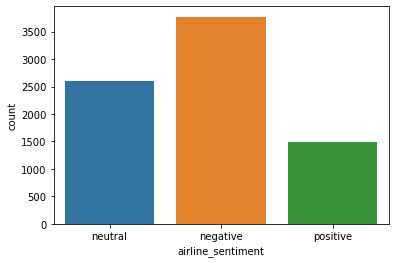

In [94]:
# Primero mostramos cómo se distribuyen las clases de salida
sns.countplot(x='airline_sentiment', data=df_t)
df_t['airline_sentiment'].value_counts()

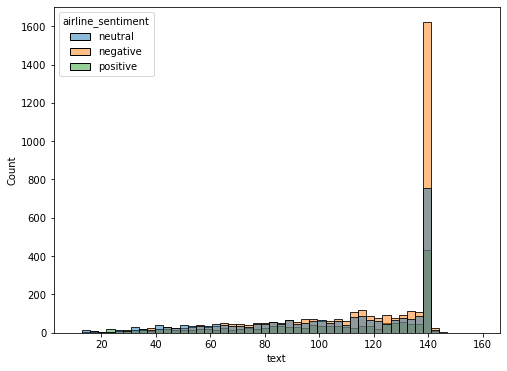

In [95]:
# Mostramos la distribución de la longitud de los textos
plt.figure(figsize=[8, 6])
sns.histplot(data=df_t,
             x=df_t['text'].str.len(),
             hue='airline_sentiment',
             bins=50);

En principio esta distribución no debería sorprendernos, ya que estamos trabajando con textos de tweets que sabemos que por defecto tienen 140 caracteres como máximo, o por lo menos antes era así. Pero esto nos permite hacernos una idea de lo informativo que puede ser un gráfico de este tipo.

## Practice

**Selecciona o escribe un texto que incluya varias freses, signos de interrogación y/o exclamación, números, caracteres no ASCII, emojis y alguna URL y guárdalo en una variable llamada `my_text`.**

In [96]:
my_text = '''El burro Pelayo hoy cumple 4 años y su madre y su padre le han levantado con canciones y muchos regalos 🎁🎁🎁.¡Qué contento está Pelayo! Con 4 años, ya es un burro grande y puede ir él solito a recoger agua, arar la tierra y pasear por la pradera hasta las 4 de la tarde.
El granjero le carga 4 jarras y se van juntos paseando para llenarlas de agua en el pozo del pueblo más cercano.
Por el camino Pelayo y el granjero se encuentran con 4 burros y sus 4 dueños que vuelven de recoger agua por el camino del pueblo.
Todos felicitan a Pelayo por su 4º cumpleaños.- ¡Qué bien te veo Pelayo! ¡Felicidades🎉! – le dicen todos sus amigos.
Cuando vuelven a casa, su madre le ha preparado una tarta de zanahorias. Una tarta con 4 pisos de bizcocho y 4 velas preciosas.
Pero Pelayo se disgusta un poco al no ver a sus 4 amigos en su fiesta de cumpleaños.
De repente, escucha un ruido extraño que viene del granero. Se acerca y, al abrir la puerta, sus 4 amigos gritan al mismo tiempo- ¡Sorpresa! ¡Feliz cumpleaños, Pelayo!
Sus amigos le dan 4 regalos y se toman 4 trozos de la deliciosa tarta de cumpleaños.
Todos cantan y bailan sin cesar y al caer la noche todos se van a sus granjas para descansar.
Ha sido una fiesta estupenda y el burrito ya sueña con su próximo cumpleaños. ¡Descansa Pelayo, que todavía te queda un año!
Fuente: www.cuentosyrecetas.com'''
print(my_text)

El burro Pelayo hoy cumple 4 años y su madre y su padre le han levantado con canciones y muchos regalos 🎁🎁🎁.¡Qué contento está Pelayo! Con 4 años, ya es un burro grande y puede ir él solito a recoger agua, arar la tierra y pasear por la pradera hasta las 4 de la tarde.
El granjero le carga 4 jarras y se van juntos paseando para llenarlas de agua en el pozo del pueblo más cercano.
Por el camino Pelayo y el granjero se encuentran con 4 burros y sus 4 dueños que vuelven de recoger agua por el camino del pueblo.
Todos felicitan a Pelayo por su 4º cumpleaños.- ¡Qué bien te veo Pelayo! ¡Felicidades🎉! – le dicen todos sus amigos.
Cuando vuelven a casa, su madre le ha preparado una tarta de zanahorias. Una tarta con 4 pisos de bizcocho y 4 velas preciosas.
Pero Pelayo se disgusta un poco al no ver a sus 4 amigos en su fiesta de cumpleaños.
De repente, escucha un ruido extraño que viene del granero. Se acerca y, al abrir la puerta, sus 4 amigos gritan al mismo tiempo- ¡Sorpresa! ¡Feliz cumpleañ

**Clasifica el texto según el idioma en el que está escrito.**

In [97]:
# Importa la librería necesaria
from langdetect import detect

In [98]:
# Detecta el idioma
detect(my_text)

'es'

**Crea una función `extract_features()` con 3 características del texto que te resulten interesantes.**

In [99]:
# Importa la librería necesaria
from nltk.corpus import stopwords

In [100]:
# Define la función
def extract_features(text):
    features = {}
    
    features['characters_count'] = len(text)
    features['contains_unicode_characters'] = any([ord(char) > 255] for char in text)
    
    STOPWORDS_NLTK = stopwords.words('spanish')
    features['stopwords_count'] = len([word for word in str(text).split() if word not in STOPWORDS_NLTK])

    return features

In [101]:
# Extrae las características del texto
extract_features(my_text)

{'characters_count': 1347,
 'contains_unicode_characters': True,
 'stopwords_count': 150}

**Pon el texto en minúsculas.**

In [102]:
my_text_clean = my_text.lower()
my_text_clean

'el burro pelayo hoy cumple 4 años y su madre y su padre le han levantado con canciones y muchos regalos 🎁🎁🎁.¡qué contento está pelayo! con 4 años, ya es un burro grande y puede ir él solito a recoger agua, arar la tierra y pasear por la pradera hasta las 4 de la tarde.\nel granjero le carga 4 jarras y se van juntos paseando para llenarlas de agua en el pozo del pueblo más cercano.\npor el camino pelayo y el granjero se encuentran con 4 burros y sus 4 dueños que vuelven de recoger agua por el camino del pueblo.\ntodos felicitan a pelayo por su 4º cumpleaños.- ¡qué bien te veo pelayo! ¡felicidades🎉! – le dicen todos sus amigos.\ncuando vuelven a casa, su madre le ha preparado una tarta de zanahorias. una tarta con 4 pisos de bizcocho y 4 velas preciosas.\npero pelayo se disgusta un poco al no ver a sus 4 amigos en su fiesta de cumpleaños.\nde repente, escucha un ruido extraño que viene del granero. se acerca y, al abrir la puerta, sus 4 amigos gritan al mismo tiempo- ¡sorpresa! ¡feliz c

**Sustituye los números por un espacio.**

In [103]:
# Importa la librería necesaria
import re

In [104]:
# Realiza la sustitución
my_text_clean = re.sub(r'\d+', ' ', my_text_clean)
my_text_clean

'el burro pelayo hoy cumple   años y su madre y su padre le han levantado con canciones y muchos regalos 🎁🎁🎁.¡qué contento está pelayo! con   años, ya es un burro grande y puede ir él solito a recoger agua, arar la tierra y pasear por la pradera hasta las   de la tarde.\nel granjero le carga   jarras y se van juntos paseando para llenarlas de agua en el pozo del pueblo más cercano.\npor el camino pelayo y el granjero se encuentran con   burros y sus   dueños que vuelven de recoger agua por el camino del pueblo.\ntodos felicitan a pelayo por su  º cumpleaños.- ¡qué bien te veo pelayo! ¡felicidades🎉! – le dicen todos sus amigos.\ncuando vuelven a casa, su madre le ha preparado una tarta de zanahorias. una tarta con   pisos de bizcocho y   velas preciosas.\npero pelayo se disgusta un poco al no ver a sus   amigos en su fiesta de cumpleaños.\nde repente, escucha un ruido extraño que viene del granero. se acerca y, al abrir la puerta, sus   amigos gritan al mismo tiempo- ¡sorpresa! ¡feliz c

**Elimina las URL del texto.**

In [105]:
# Define la expresión regular para detectar URLs
url_regex = r'(https?:\/\/)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'

In [106]:
# Elimina la URL
my_text_clean = re.sub(url_regex, '', my_text_clean)
my_text_clean

'el burro pelayo hoy cumple   años y su madre y su padre le han levantado con canciones y muchos regalos 🎁🎁🎁.¡qué contento está pelayo! con   años, ya es un burro grande y puede ir él solito a recoger agua, arar la tierra y pasear por la pradera hasta las   de la tarde.\nel granjero le carga   jarras y se van juntos paseando para llenarlas de agua en el pozo del pueblo más cercano.\npor el camino pelayo y el granjero se encuentran con   burros y sus   dueños que vuelven de recoger agua por el camino del pueblo.\ntodos felicitan a pelayo por su  º cumpleaños.- ¡qué bien te veo pelayo! ¡felicidades🎉! – le dicen todos sus amigos.\ncuando vuelven a casa, su madre le ha preparado una tarta de zanahorias. una tarta con   pisos de bizcocho y   velas preciosas.\npero pelayo se disgusta un poco al no ver a sus   amigos en su fiesta de cumpleaños.\nde repente, escucha un ruido extraño que viene del granero. se acerca y, al abrir la puerta, sus   amigos gritan al mismo tiempo- ¡sorpresa! ¡feliz c

**Sustituye los emojis por su forma textual.**

In [107]:
# Importa la librería necesaria
import emoji

In [108]:
# Realiza la sustitución
my_text_clean = emoji.demojize(my_text_clean, language='es')
my_text_clean

'el burro pelayo hoy cumple   años y su madre y su padre le han levantado con canciones y muchos regalos :regalo::regalo::regalo:.¡qué contento está pelayo! con   años, ya es un burro grande y puede ir él solito a recoger agua, arar la tierra y pasear por la pradera hasta las   de la tarde.\nel granjero le carga   jarras y se van juntos paseando para llenarlas de agua en el pozo del pueblo más cercano.\npor el camino pelayo y el granjero se encuentran con   burros y sus   dueños que vuelven de recoger agua por el camino del pueblo.\ntodos felicitan a pelayo por su  º cumpleaños.- ¡qué bien te veo pelayo! ¡felicidades:cañón_de_confeti:! – le dicen todos sus amigos.\ncuando vuelven a casa, su madre le ha preparado una tarta de zanahorias. una tarta con   pisos de bizcocho y   velas preciosas.\npero pelayo se disgusta un poco al no ver a sus   amigos en su fiesta de cumpleaños.\nde repente, escucha un ruido extraño que viene del granero. se acerca y, al abrir la puerta, sus   amigos grita

**Quita los acentos y otros caracteres no ASCII del texto.**

In [109]:
# Importa la librería necesaria
from unidecode import unidecode

In [110]:
# Elimina los caracteres no ASCII
my_text_clean = unidecode(my_text_clean)
my_text_clean

'el burro pelayo hoy cumple   anos y su madre y su padre le han levantado con canciones y muchos regalos :regalo::regalo::regalo:.!que contento esta pelayo! con   anos, ya es un burro grande y puede ir el solito a recoger agua, arar la tierra y pasear por la pradera hasta las   de la tarde.\nel granjero le carga   jarras y se van juntos paseando para llenarlas de agua en el pozo del pueblo mas cercano.\npor el camino pelayo y el granjero se encuentran con   burros y sus   duenos que vuelven de recoger agua por el camino del pueblo.\ntodos felicitan a pelayo por su  o cumpleanos.- !que bien te veo pelayo! !felicidades:canon_de_confeti:! - le dicen todos sus amigos.\ncuando vuelven a casa, su madre le ha preparado una tarta de zanahorias. una tarta con   pisos de bizcocho y   velas preciosas.\npero pelayo se disgusta un poco al no ver a sus   amigos en su fiesta de cumpleanos.\nde repente, escucha un ruido extrano que viene del granero. se acerca y, al abrir la puerta, sus   amigos grita

**Sustituye lo signos de puntuación por un espacio.**

In [111]:
# Instancia los signos de puntuación
punct_es = r'.,;:"#$%&\'()*+-/<=>@[\\]^_`{|}~¿?¡!ºª'

In [112]:
# Crea la tabla de mapeo
traslator = str.maketrans(punct_es, ' '*len(punct_es))

# Haz los reemplazos
my_text_clean = my_text_clean.translate(traslator)
my_text_clean

'el burro pelayo hoy cumple   anos y su madre y su padre le han levantado con canciones y muchos regalos  regalo  regalo  regalo   que contento esta pelayo  con   anos  ya es un burro grande y puede ir el solito a recoger agua  arar la tierra y pasear por la pradera hasta las   de la tarde \nel granjero le carga   jarras y se van juntos paseando para llenarlas de agua en el pozo del pueblo mas cercano \npor el camino pelayo y el granjero se encuentran con   burros y sus   duenos que vuelven de recoger agua por el camino del pueblo \ntodos felicitan a pelayo por su  o cumpleanos    que bien te veo pelayo   felicidades canon de confeti     le dicen todos sus amigos \ncuando vuelven a casa  su madre le ha preparado una tarta de zanahorias  una tarta con   pisos de bizcocho y   velas preciosas \npero pelayo se disgusta un poco al no ver a sus   amigos en su fiesta de cumpleanos \nde repente  escucha un ruido extrano que viene del granero  se acerca y  al abrir la puerta  sus   amigos grita

**Limpia los espacios innecesarios, quitando también los saltos de línea.**

In [113]:
# Limpia los espacios de los extremos
my_text_clean = my_text_clean.strip()

# Limpia los espacios del interior
my_text_clean = re.sub(r'\s{2,}', ' ', my_text_clean)
my_text_clean

'el burro pelayo hoy cumple anos y su madre y su padre le han levantado con canciones y muchos regalos regalo regalo regalo que contento esta pelayo con anos ya es un burro grande y puede ir el solito a recoger agua arar la tierra y pasear por la pradera hasta las de la tarde el granjero le carga jarras y se van juntos paseando para llenarlas de agua en el pozo del pueblo mas cercano por el camino pelayo y el granjero se encuentran con burros y sus duenos que vuelven de recoger agua por el camino del pueblo todos felicitan a pelayo por su o cumpleanos que bien te veo pelayo felicidades canon de confeti le dicen todos sus amigos cuando vuelven a casa su madre le ha preparado una tarta de zanahorias una tarta con pisos de bizcocho y velas preciosas pero pelayo se disgusta un poco al no ver a sus amigos en su fiesta de cumpleanos de repente escucha un ruido extrano que viene del granero se acerca y al abrir la puerta sus amigos gritan al mismo tiempo sorpresa feliz cumpleanos pelayo sus a

**Quita las stopwords.**

In [114]:
# Importa las palabras vacías desde la librería
from nltk.corpus import stopwords

In [115]:
# Guarda el listado de palabras vacías en una variable
STOPWORDS_NLTK = stopwords.words('spanish')

In [116]:
# Crea función para eliminar palabras vacías
def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word not in STOPWORDS_NLTK])

In [117]:
# Elimina las palabras vacías
my_text_clean = remove_stopwords(my_text_clean)
my_text_clean

'burro pelayo hoy cumple anos madre padre levantado canciones regalos regalo regalo regalo contento pelayo anos burro grande puede ir solito recoger agua arar tierra pasear pradera tarde granjero carga jarras van juntos paseando llenarlas agua pozo pueblo mas cercano camino pelayo granjero encuentran burros duenos vuelven recoger agua camino pueblo felicitan pelayo cumpleanos bien veo pelayo felicidades canon confeti dicen amigos vuelven casa madre preparado tarta zanahorias tarta pisos bizcocho velas preciosas pelayo disgusta ver amigos fiesta cumpleanos repente escucha ruido extrano viene granero acerca abrir puerta amigos gritan mismo tiempo sorpresa feliz cumpleanos pelayo amigos dan regalos toman trozos deliciosa tarta cumpleanos cantan bailan cesar caer noche van granjas descansar sido fiesta estupenda burrito suena proximo cumpleanos descansa pelayo todavia queda ano fuente'